In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter
from scipy.optimize import curve_fit
import scipy.stats as stats


In [20]:

def remove_outliers(df, column_name):
    # Calculate the mean of the column
    mean_value = df[column_name].mean()

    # Define the upper threshold (4 to 5 times the mean)
    upper_threshold =40 * mean_value

    # Filter the data and keep only rows with values within the threshold
    filtered_df = df[df[column_name] <= upper_threshold]

    return filtered_df


In [21]:
dfMod_april = pd.read_csv('April_data/outdoor_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfAlp_april = pd.read_csv('April_data/alpha_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfBet_april = pd.read_csv('April_data/beta_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')

dfMod_may = pd.read_csv('May_data/outdoor_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfAlp_may = pd.read_csv('May_data/alpha_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfBet_may = pd.read_csv('May_data/beta_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')

dfAlp = pd.concat([dfAlp_april,dfAlp_may])
dfBet = pd.concat([dfBet_april,dfBet_may])
dfMod = pd.concat([dfMod_april,dfMod_may])

dfAlp.rename(columns={'timestamp_local':'Date'},inplace=True)
dfBet.rename(columns={'timestamp_local':'Date'},inplace=True)
dfAlp.rename(columns={'sample_rh':'rh'},inplace=True)
dfBet.rename(columns={'sample_rh':'rh'},inplace=True)
dfAlp.rename(columns={'sample_temp':'temp'},inplace=True)
dfBet.rename(columns={'sample_temp':'temp'},inplace=True)
dfMod.index = dfMod.index.map(lambda x: x.replace(second=0))
dfAlp.index = dfAlp.index.map(lambda x: x.replace(second=0))
dfBet.index = dfBet.index.map(lambda x: x.replace(second=0))
common_timestamps = dfMod.index.intersection(dfAlp.index).intersection(dfBet.index)

# Filter each DataFrame to keep only the rows with common timestamps
dfMod = dfMod[dfMod.index.isin(common_timestamps)]
dfAlp = dfAlp[dfAlp.index.isin(common_timestamps)]
dfBet = dfBet[dfBet.index.isin(common_timestamps)]
print(len(dfMod), len(dfAlp), len(dfBet))


dfAlp = remove_outliers(dfAlp,'pm10')
dfBet = remove_outliers(dfBet,'pm10')
dfMod = remove_outliers(dfMod,'pm10')


OG_dfAlp = dfAlp.iloc[::-1]
OG_dfBet = dfBet.iloc[::-1]
OG_dfMod = dfMod.iloc[::-1]
print(.8*len(OG_dfAlp))

train_slice = slice(5000,int(.8*len(OG_dfAlp)))
test_slice = slice(int(.8*len(OG_dfAlp)),len(OG_dfMod))
train_dfAlp = OG_dfAlp[train_slice]
train_dfBet = OG_dfBet[train_slice]
train_dfMod = OG_dfMod[train_slice]

print(len(train_dfMod),len(train_dfAlp),len(train_dfBet))

78602 78603 78602
62760.0
57760 57760 57760


In [22]:
parameters = [
    {'name': 'rh', 'label': 'Relative Humidity', 'unit': '%'},
    {'name': 'pm1', 'label': 'PM\u2081', 'unit': 'µg/m\u00b3'},
    {'name': 'pm25', 'label': 'PM\u2082.\u2085', 'unit': 'µg/m\u00b3'},
    {'name': 'pm10', 'label': 'PM\u2081\u2080', 'unit': 'µg/m\u00b3'},
    {'name': 'temp', 'label': 'Temperature', 'unit': '°C'}
]

/tmp/ipykernel_5148/622380864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/622380864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {parameter["name"]}']=train_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/622380864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Relative Humidity P-Value Alpha: 0.0
Relative Humidity P-Value Beta: 0.0


/tmp/ipykernel_5148/622380864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/622380864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {parameter["name"]}']=train_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/622380864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

PM₁ P-Value Alpha: 1.7291318666707082e-49
PM₁ P-Value Beta: 3.734440774240189e-12


/tmp/ipykernel_5148/622380864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/622380864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {parameter["name"]}']=train_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/622380864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

PM₂.₅ P-Value Alpha: 8.824590992456942e-44
PM₂.₅ P-Value Beta: 5.124663053341435e-11


/tmp/ipykernel_5148/622380864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/622380864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {parameter["name"]}']=train_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/622380864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

PM₁₀ P-Value Alpha: 0.0011858487875040702
PM₁₀ P-Value Beta: 8.274717514730704e-06


/tmp/ipykernel_5148/622380864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/622380864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {parameter["name"]}']=train_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/622380864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Temperature P-Value Alpha: 0.0
Temperature P-Value Beta: 0.0


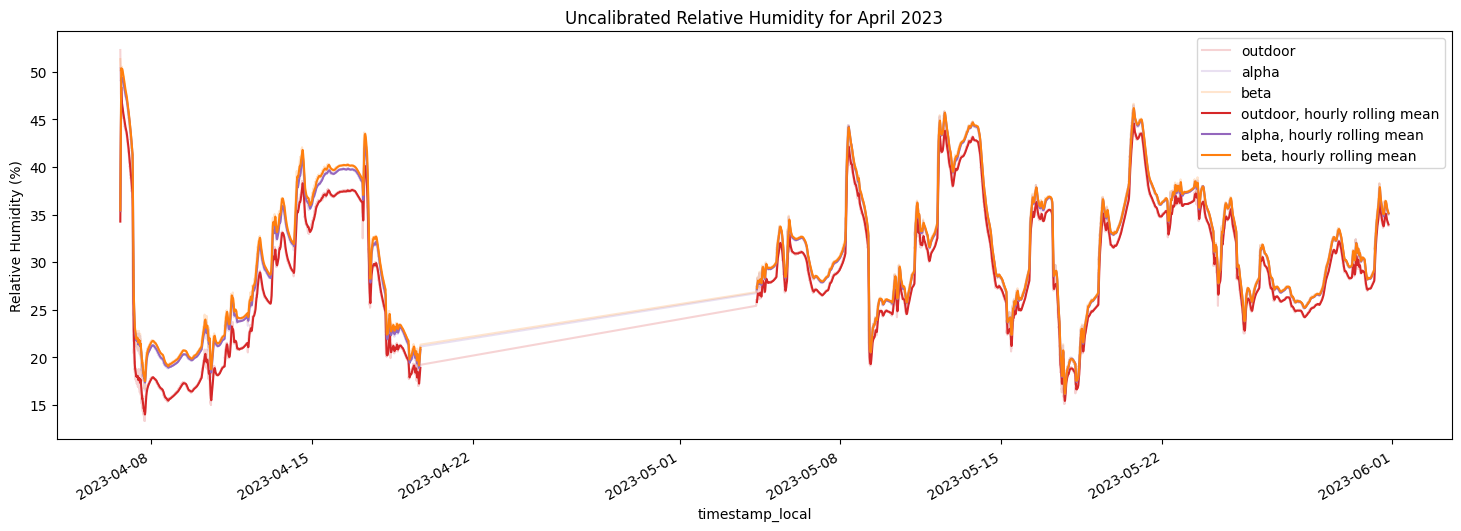

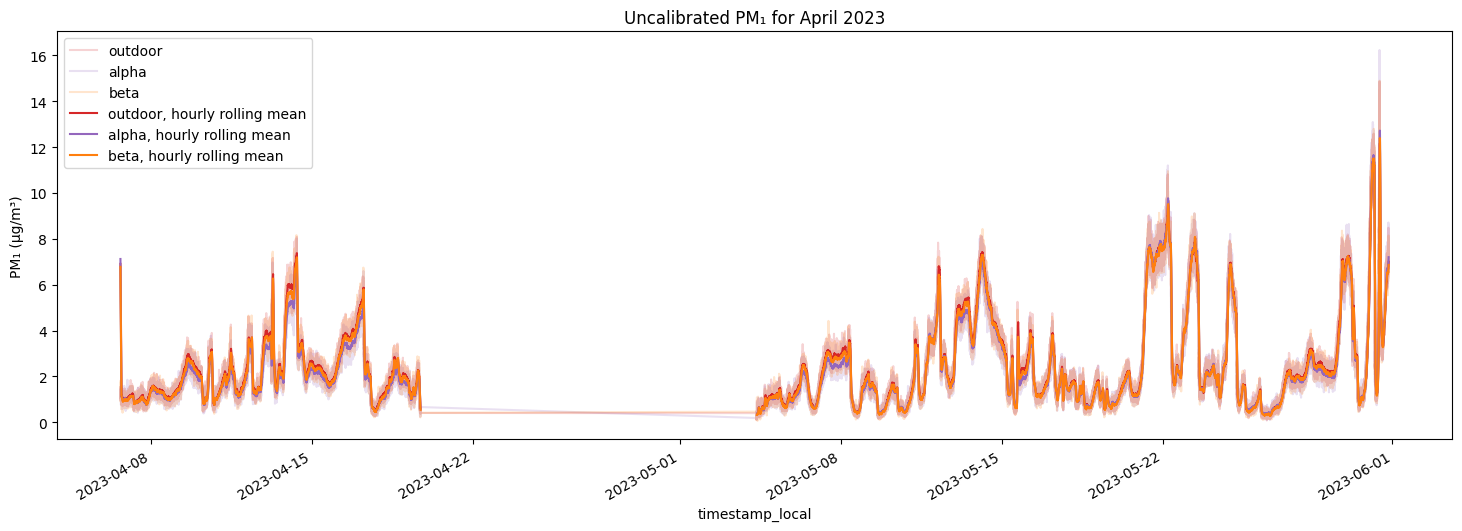

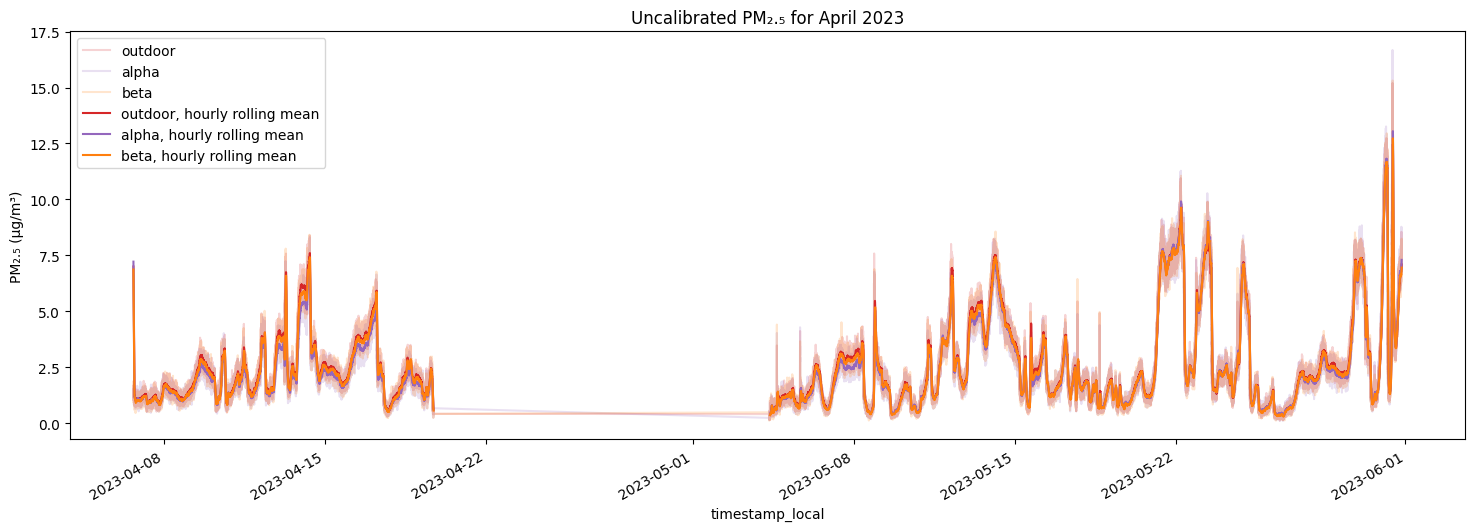

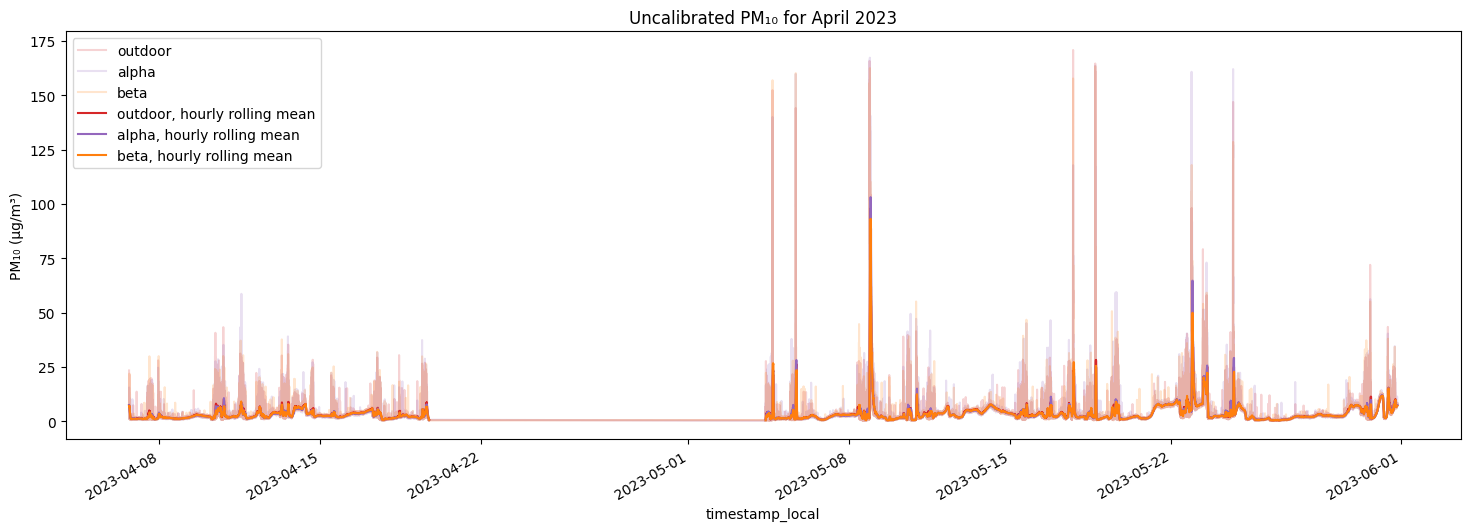

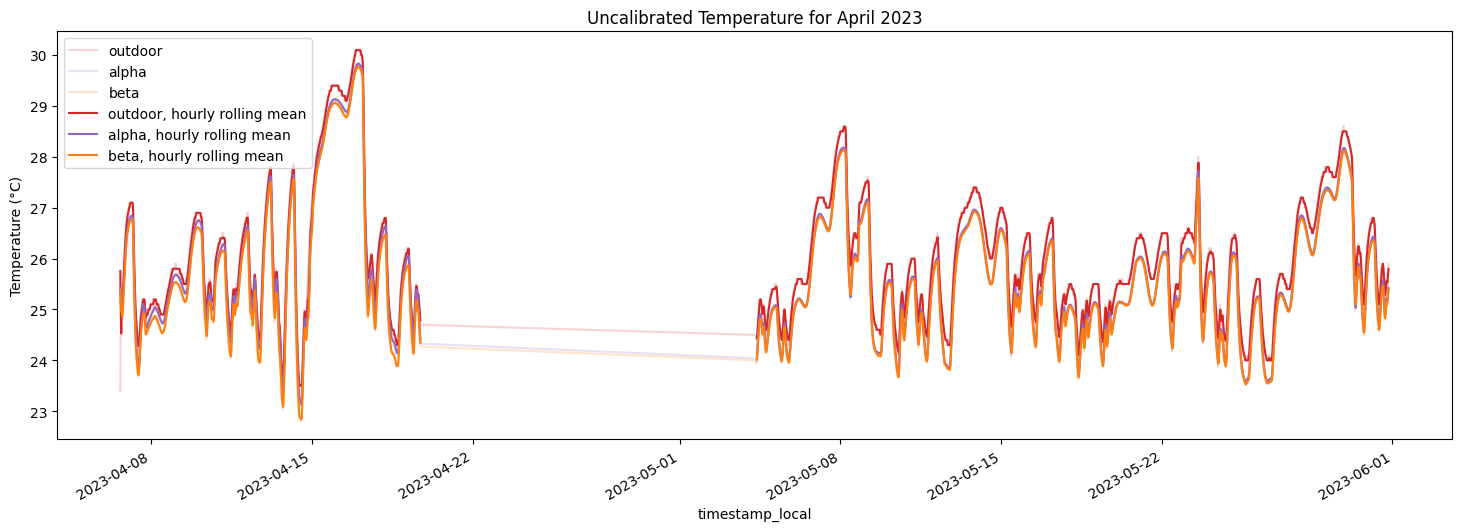

In [23]:
for parameter in parameters:
    train_dfMod[f'60 mean {parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
    train_dfAlp[f'60 mean {parameter["name"]}']=train_dfAlp[parameter['name']].rolling(60).mean()
    train_dfBet[f'60 mean {parameter["name"]}']=train_dfBet[parameter['name']].rolling(60).mean()

    fig = plt.figure()
    ax = plt.subplot(111)
    plt.gcf().set_size_inches(18, 6)
    plt.title(f'Uncalibrated {parameter["label"]} for April 2023')
    plt.ylabel(f'{parameter["label"]} ({parameter["unit"]})')
    plt.xlabel('Time (days)')
    plt.grid(True)
    

   

    train_dfMod[parameter["name"]].plot(color='tab:red', label='outdoor', alpha=0.2)
    train_dfAlp[parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.2)
    train_dfBet[parameter["name"]].plot(color='tab:orange', label='beta', alpha=0.2)
    train_dfMod[f'60 mean {parameter["name"]}'].plot(color='tab:red', label='outdoor, hourly rolling mean')
    train_dfAlp[f'60 mean {parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
    train_dfBet[f'60 mean {parameter["name"]}'].plot(color='tab:orange', label='beta, hourly rolling mean')
    plt.legend()

    _, p_value_alpha = stats.ttest_ind(train_dfMod[parameter["name"]], train_dfAlp[parameter["name"]], equal_var=False)
    _, p_value_beta = stats.ttest_ind(train_dfMod[parameter["name"]], train_dfBet[parameter["name"]], equal_var=False)
    print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
    print(f"{parameter['label']} P-Value Beta:", p_value_beta)


In [24]:
def linear_func(x, a, b):
    return a * x + b 

# r squared calculation
def r_squared(y, y_fit):
    
    ss_residuals = np.sum((y - y_fit)**2)
    ss_total = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_residuals / ss_total)
    return r2
# doing the same as above but for humidity

a = 0.9730821614488775 b = 2.480212211012275
r2 = 0.9876163799238276


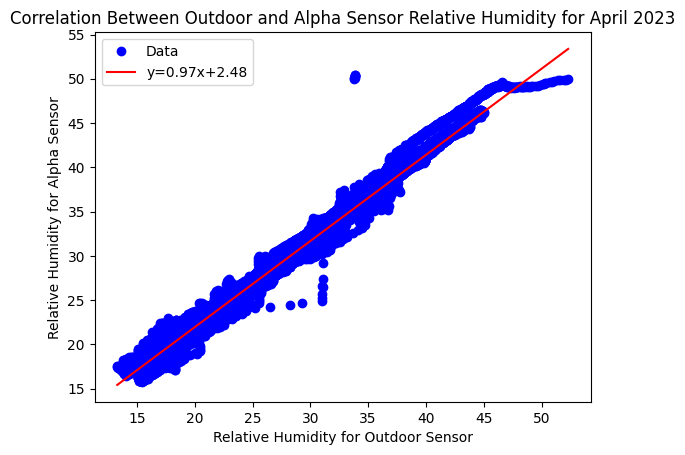

/tmp/ipykernel_5148/3086648353.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp["new " +parameter['name']] = train_dfAlp[parameter["name"]] * 1 / alpha_popt[parameter['name']][0] - alpha_popt[parameter['name']][1] / alpha_popt[parameter['name']][0]


a = 0.9712909354387005 b = 2.732696139227296
r2 = {'rh': 0.982997821189523}


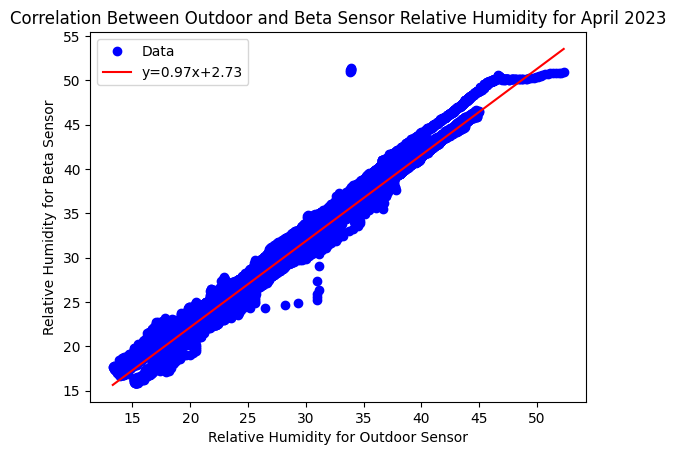

/tmp/ipykernel_5148/3086648353.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfBet["new " + parameter["name"]] = train_dfBet[parameter["name"]] * 1 / beta_popt[parameter["name"]][0] - beta_popt[parameter["name"]][1] / beta_popt[parameter["name"]][0]


a = 0.9562179548002547 b = -0.05546532569518233
r2 = 0.9508698265206745


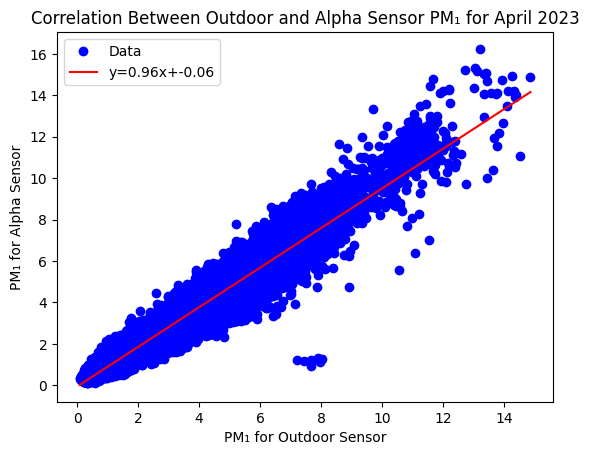

/tmp/ipykernel_5148/3086648353.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp["new " +parameter['name']] = train_dfAlp[parameter["name"]] * 1 / alpha_popt[parameter['name']][0] - alpha_popt[parameter['name']][1] / alpha_popt[parameter['name']][0]


a = 0.972477151006519 b = -0.008919300752752811
r2 = {'rh': 0.982997821189523, 'pm1': 0.9620030129065764}


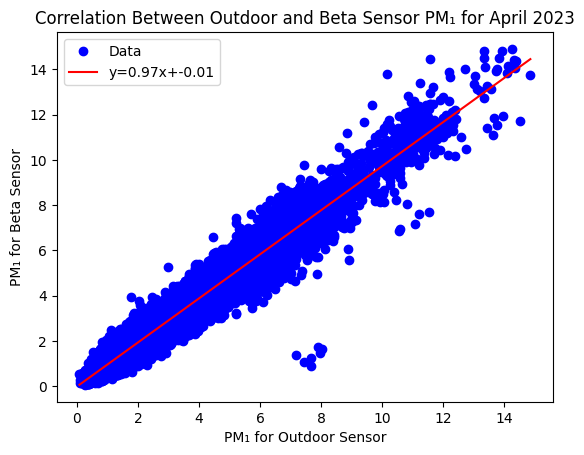

/tmp/ipykernel_5148/3086648353.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfBet["new " + parameter["name"]] = train_dfBet[parameter["name"]] * 1 / beta_popt[parameter["name"]][0] - beta_popt[parameter["name"]][1] / beta_popt[parameter["name"]][0]


a = 0.9587107278441848 b = -0.049971262981801656
r2 = 0.9493737091121515


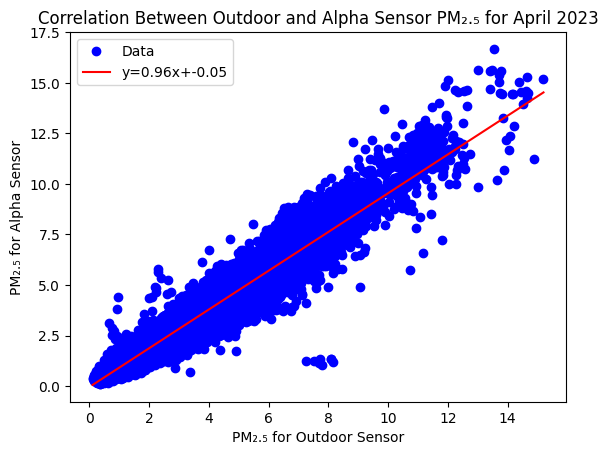

/tmp/ipykernel_5148/3086648353.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp["new " +parameter['name']] = train_dfAlp[parameter["name"]] * 1 / alpha_popt[parameter['name']][0] - alpha_popt[parameter['name']][1] / alpha_popt[parameter['name']][0]


a = 0.9741567360214004 b = -0.007488101956642179
r2 = {'rh': 0.982997821189523, 'pm1': 0.9620030129065764, 'pm25': 0.9605061756601525}


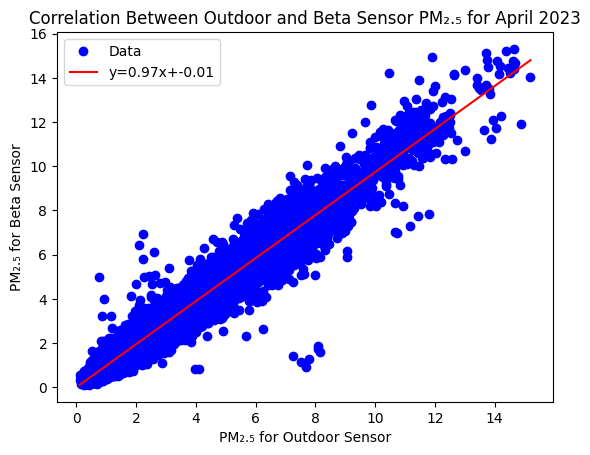

/tmp/ipykernel_5148/3086648353.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfBet["new " + parameter["name"]] = train_dfBet[parameter["name"]] * 1 / beta_popt[parameter["name"]][0] - beta_popt[parameter["name"]][1] / beta_popt[parameter["name"]][0]


a = 0.7671713477323497 b = 0.7204307792679341
r2 = 0.5166585386650827


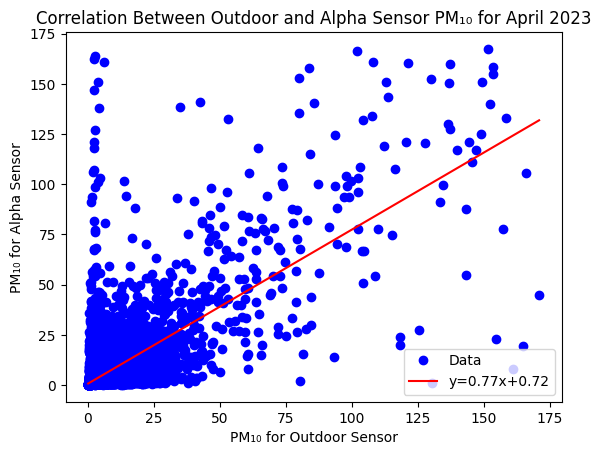

/tmp/ipykernel_5148/3086648353.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp["new " +parameter['name']] = train_dfAlp[parameter["name"]] * 1 / alpha_popt[parameter['name']][0] - alpha_popt[parameter['name']][1] / alpha_popt[parameter['name']][0]


a = 0.7107301366663267 b = 0.8873733049658076
r2 = {'rh': 0.982997821189523, 'pm1': 0.9620030129065764, 'pm25': 0.9605061756601525, 'pm10': 0.5404798530571442}


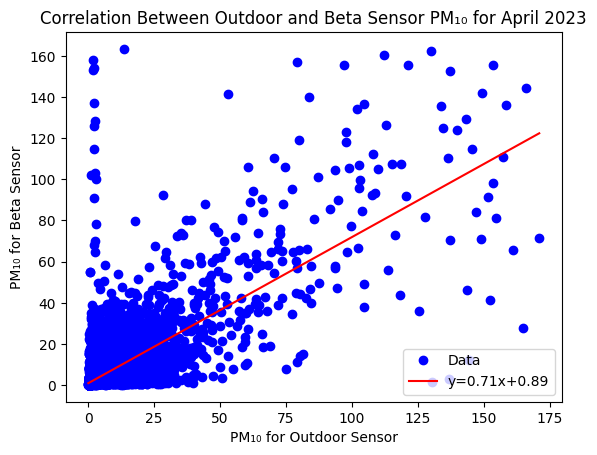

/tmp/ipykernel_5148/3086648353.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfBet["new " + parameter["name"]] = train_dfBet[parameter["name"]] * 1 / beta_popt[parameter["name"]][0] - beta_popt[parameter["name"]][1] / beta_popt[parameter["name"]][0]


a = 1.0038678158739636 b = -0.42906185594257873
r2 = 0.990316302666122


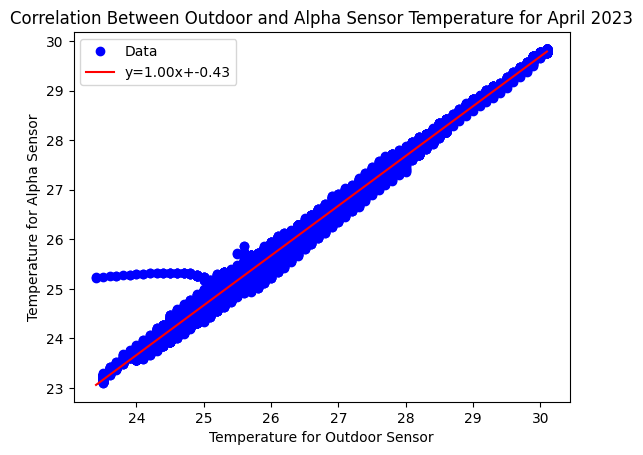

/tmp/ipykernel_5148/3086648353.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp["new " +parameter['name']] = train_dfAlp[parameter["name"]] * 1 / alpha_popt[parameter['name']][0] - alpha_popt[parameter['name']][1] / alpha_popt[parameter['name']][0]


a = 1.014364923463883 b = -0.7871904663315945
r2 = {'rh': 0.982997821189523, 'pm1': 0.9620030129065764, 'pm25': 0.9605061756601525, 'pm10': 0.5404798530571442, 'temp': 0.9945149727975751}


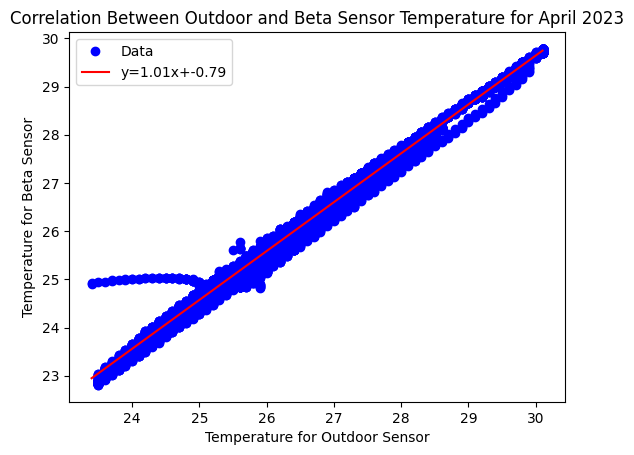

/tmp/ipykernel_5148/3086648353.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfBet["new " + parameter["name"]] = train_dfBet[parameter["name"]] * 1 / beta_popt[parameter["name"]][0] - beta_popt[parameter["name"]][1] / beta_popt[parameter["name"]][0]


In [25]:
# Plotting the first figure
alpha_popt = {}
alpha_pcov = {}
alpha_r2 = {}
beta_popt = {}
beta_pcov = {}
beta_r2 = {}
for parameter in parameters:
    fig = plt.figure()
    ax1 = plt.subplot(111)

    x_fit = np.linspace(min(train_dfMod[parameter["name"]]), max(train_dfMod[parameter["name"]]), len(train_dfMod[parameter["name"]]))
    alpha_popt[parameter['name']], alpha_pcov[parameter["name"]] = curve_fit(linear_func, train_dfMod[parameter["name"]], train_dfAlp[parameter["name"]][:len(train_dfMod[parameter["name"]])])

    alpha_fit = linear_func(x_fit, *alpha_popt[parameter['name']])
    alpha_r2[parameter['name']] = r_squared(train_dfAlp[parameter["name"]].values[:len(train_dfMod[parameter["name"]])], linear_func(train_dfMod[parameter["name"]], *alpha_popt[parameter['name']]))

    print("a =", alpha_popt[parameter['name']][0], "b =", alpha_popt[parameter["name"]][1])
    print("r2 =", alpha_r2[parameter['name']])
    plt.plot(train_dfMod[parameter["name"]], train_dfAlp[parameter["name"]][:len(train_dfMod[parameter["name"]])], 'bo', label='Data')
    plt.plot(x_fit, alpha_fit, 'r-', label=f'y={alpha_popt[parameter["name"]][0]:.2f}x+{alpha_popt[parameter["name"]][1]:.2f}')
    plt.legend()
    plt.xlabel(f'{parameter["label"]} for Outdoor Sensor')
    plt.ylabel(f'{parameter["label"]} for Alpha Sensor')
    plt.title(f'Correlation Between Outdoor and Alpha Sensor {parameter["label"]} for April 2023')
    plt.show()

    train_dfAlp["new " +parameter['name']] = train_dfAlp[parameter["name"]] * 1 / alpha_popt[parameter['name']][0] - alpha_popt[parameter['name']][1] / alpha_popt[parameter['name']][0]

    beta_popt[parameter['name']], beta_pcov[parameter['name']] = curve_fit(linear_func, train_dfMod[parameter['name']], train_dfBet[parameter['name']][:len(train_dfMod[parameter['name']])])

    beta_fit = linear_func(x_fit, *beta_popt[parameter['name']])
    beta_r2[parameter["name"]] = r_squared(train_dfBet[parameter['name']].values[:len(train_dfMod[parameter['name']])], linear_func(train_dfMod[parameter['name']], *beta_popt[parameter['name']]))

    print("a =", beta_popt[parameter['name']][0], "b =", beta_popt[parameter['name']][1])
    print("r2 =",beta_r2)
    plt.plot(train_dfMod[parameter['name']], train_dfBet[parameter['name']][:len(train_dfMod[parameter['name']])], 'bo', label='Data')
    plt.plot(x_fit, beta_fit, 'r-', label=f'y={beta_popt[parameter["name"]][0]:.2f}x+{beta_popt[parameter["name"]][1]:.2f}')

    plt.legend()
    plt.xlabel(f'{parameter["label"]} for Outdoor Sensor')
    plt.ylabel(f'{parameter["label"]} for Beta Sensor')
    plt.title(f'Correlation Between Outdoor and Beta Sensor {parameter["label"]} for April 2023')
    plt.show()

    train_dfBet["new " + parameter["name"]] = train_dfBet[parameter["name"]] * 1 / beta_popt[parameter["name"]][0] - beta_popt[parameter["name"]][1] / beta_popt[parameter["name"]][0]

In [26]:
for parameter in parameters:
    print( 'Alpha ' + f'{parameter["label"]} r²: {alpha_r2[parameter["name"]]}')
    print( 'Beta '  + f'{parameter["label"]} r²: {beta_r2[parameter["name"]]}')

Alpha Relative Humidity r²: 0.9876163799238276
Beta Relative Humidity r²: 0.982997821189523
Alpha PM₁ r²: 0.9508698265206745
Beta PM₁ r²: 0.9620030129065764
Alpha PM₂.₅ r²: 0.9493737091121515
Beta PM₂.₅ r²: 0.9605061756601525
Alpha PM₁₀ r²: 0.5166585386650827
Beta PM₁₀ r²: 0.5404798530571442
Alpha Temperature r²: 0.990316302666122
Beta Temperature r²: 0.9945149727975751


/tmp/ipykernel_5148/919205156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {"new " +parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/919205156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {"new " +parameter["name"]}']=train_dfAlp["new " +parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/919205156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

Relative Humidity P-Value Alpha: 0.9999999999999332
Relative Humidity P-Value Beta: 0.999999951824561


/tmp/ipykernel_5148/919205156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {"new " +parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/919205156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {"new " +parameter["name"]}']=train_dfAlp["new " +parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/919205156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

PM₁ P-Value Alpha: 0.9999995818452001
PM₁ P-Value Beta: 0.9999985462665391


/tmp/ipykernel_5148/919205156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {"new " +parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/919205156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {"new " +parameter["name"]}']=train_dfAlp["new " +parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/919205156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

PM₂.₅ P-Value Alpha: 0.9999999999319207
PM₂.₅ P-Value Beta: 0.9999999999021262


/tmp/ipykernel_5148/919205156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {"new " +parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/919205156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {"new " +parameter["name"]}']=train_dfAlp["new " +parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/919205156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

PM₁₀ P-Value Alpha: 0.9999999994796418
PM₁₀ P-Value Beta: 0.9999999990082473


/tmp/ipykernel_5148/919205156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {"new " +parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/919205156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {"new " +parameter["name"]}']=train_dfAlp["new " +parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/919205156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

Temperature P-Value Alpha: 0.9999999994209976
Temperature P-Value Beta: 0.999999998649495


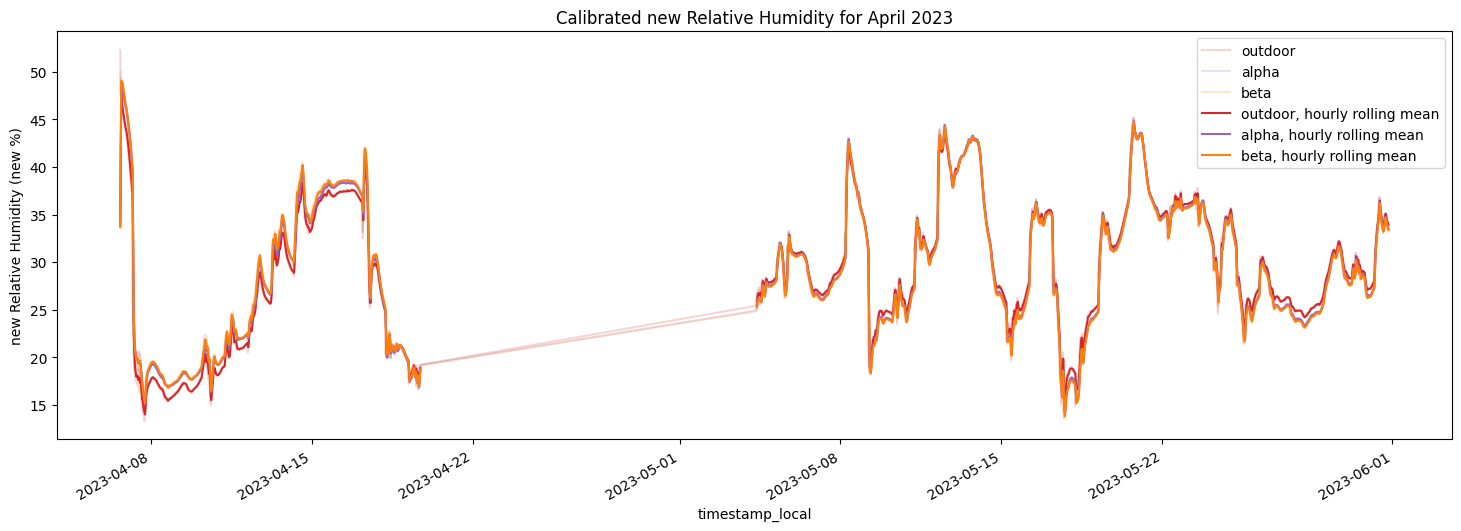

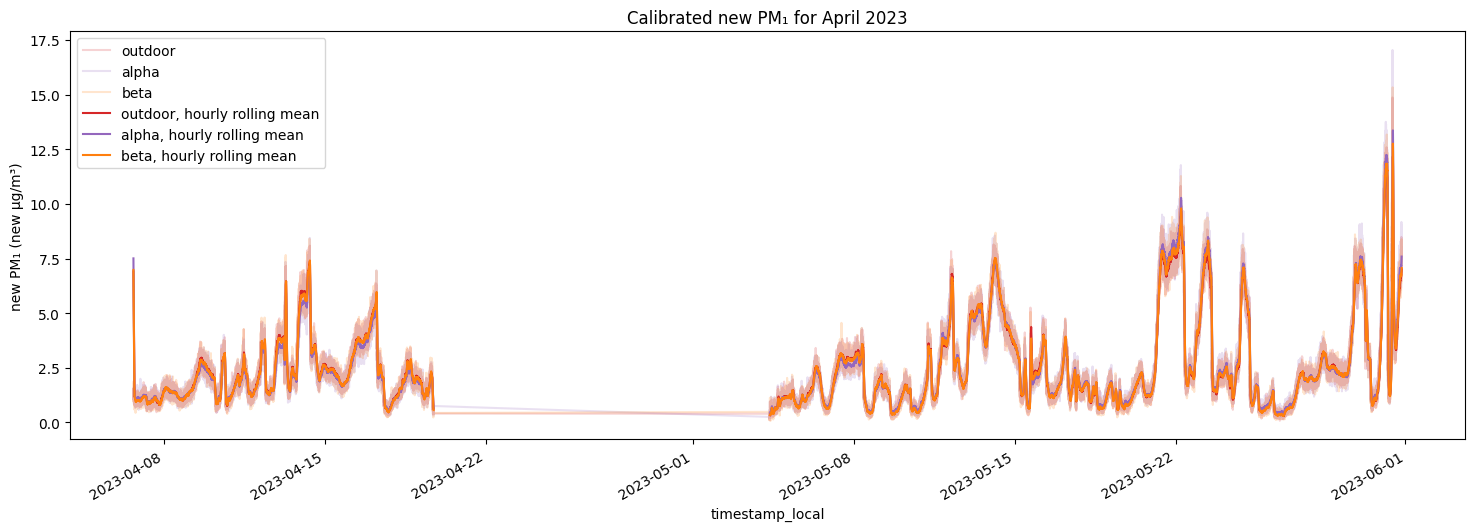

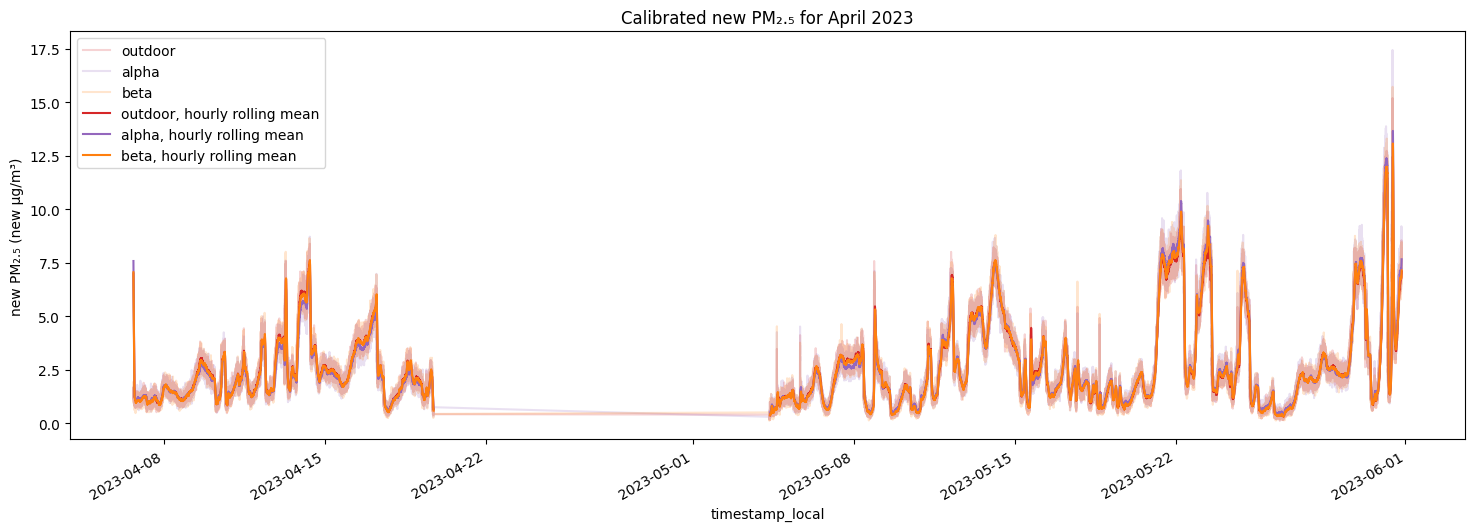

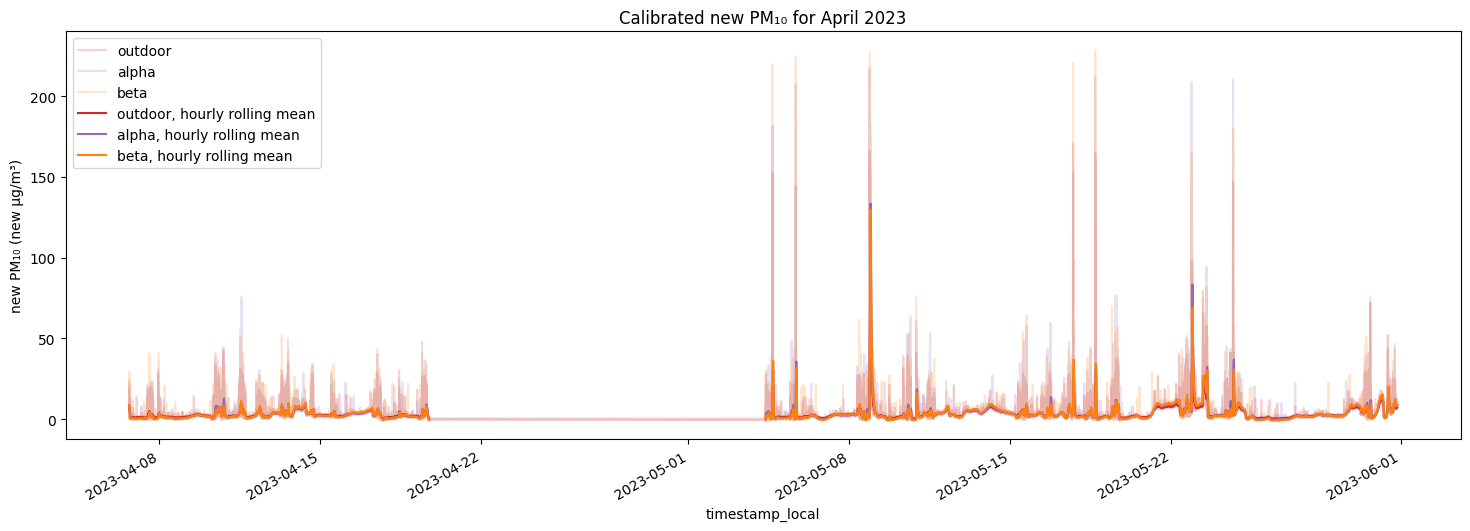

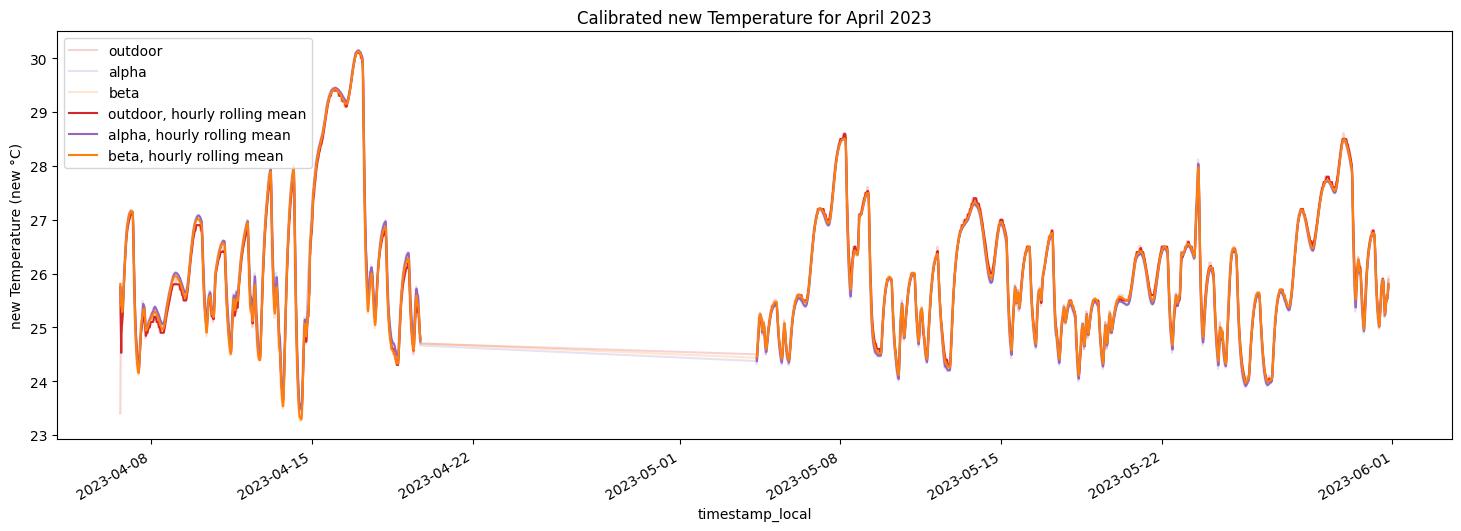

In [29]:
for parameter in parameters:
    train_dfMod[f'60 mean {"new " +parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
    train_dfAlp[f'60 mean {"new " +parameter["name"]}']=train_dfAlp["new " +parameter['name']].rolling(60).mean()
    train_dfBet[f'60 mean {"new " +parameter["name"]}']=train_dfBet["new " +parameter['name']].rolling(60).mean()

    fig = plt.figure()
    ax = plt.subplot(111)
    plt.gcf().set_size_inches(18, 6)
    plt.title(f'Calibrated {"new " +parameter["label"]} for April 2023')
    plt.ylabel(f'{"new " +parameter["label"]} ({"new " +parameter["unit"]})')
    plt.xlabel('Time (days)')
    plt.grid(True)
    

   

    train_dfMod[parameter["name"]].plot(color='tab:red', label='outdoor', alpha=0.2)
    train_dfAlp["new " +parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.2)
    train_dfBet["new " +parameter["name"]].plot(color='tab:orange', label='beta', alpha=0.2)
    train_dfMod[f'60 mean {"new " +parameter["name"]}'].plot(color='tab:red', label='outdoor, hourly rolling mean')
    train_dfAlp[f'60 mean {"new " +parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
    train_dfBet[f'60 mean {"new " +parameter["name"]}'].plot(color='tab:orange', label='beta, hourly rolling mean')
    plt.legend()

    _, p_value_alpha = stats.ttest_ind(train_dfMod[parameter["name"]], train_dfAlp["new " +parameter["name"]], equal_var=False)
    _, p_value_beta = stats.ttest_ind(train_dfMod[parameter["name"]], train_dfBet["new " +parameter["name"]], equal_var=False)

    print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
    print(f"{parameter['label']} P-Value Beta:", p_value_beta)

In [ ]:
# ratio = {}
# for parameter in parameters:
#     dfMod[f'60 mean {parameter["name"]}']=dfMod[parameter['name']].rolling(60).mean()
#     dfAlp[f'60 mean {parameter["name"]}']=dfAlp[parameter['name']].rolling(60).mean()

#     ratio[parameter["name"]] = dfMod[f'60 mean {parameter["name"]}']/dfAlp[f'60 mean {parameter["name"]}']

#     print(f'Ratio of {parameter["label"]} is {ratio[parameter["name"]].mean()}')
#     dfAlp[parameter['name']] = dfAlp[parameter['name']]*ratio[parameter["name"]].mean()
#     dfAlp[f'60 mean {parameter["name"]}'] = dfAlp[f'60 mean {parameter["name"]}']*ratio[parameter["name"]].mean()
   
#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.gcf().set_size_inches(18, 6)
#     plt.title(f'Calibrated Hourly rolling mean of {parameter["label"]} for April 2023')
#     plt.ylabel(f'{parameter["label"]} ({parameter["unit"]})')
#     plt.xlabel('Time (days)')
#     plt.grid(True)
    

   

#     dfMod[parameter["name"]].plot(color='tab:green', label='outdoor', alpha=0.5) 
#     dfAlp[parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.5)
#     dfMod[f'60 mean {parameter["name"]}'].plot(color='tab:green', label='outdoor, hourly rolling mean')
#     dfAlp[f'60 mean {parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
#     plt.legend()

#     _, p_value = stats.ttest_ind(dfMod[parameter["name"]], dfAlp[parameter["name"]], equal_var=False)
#     print("P-Value:", p_value)


In [ ]:
# for parameter in parameters:
#     print(ratio[parameter["name"]].mean())

In [ ]:
# new_dfAlp = pd.read_csv('May_data/alpha_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
# new_dfBet = pd.read_csv('May_data/beta_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
# new_dfMod = pd.read_csv('May_data/outdoor_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')

# new_dfAlp = new_dfAlp.iloc[::-1]
# new_dfBet = new_dfBet.iloc[::-1]
# new_dfMod = new_dfMod.iloc[::-1]

# new_dfMod = remove_outliers(new_dfMod, 'pm10')
# new_dfAlp = remove_outliers(new_dfAlp, 'pm10')
# new_dfBet = remove_outliers(new_dfBet, 'pm10')
# new_dfAlp = new_dfAlp
# new_dfBet = new_dfBet
# new_dfMod = new_dfMod

# # new_dfAlp = pd.read_csv('April_data/alpha_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')[25000:40000]
# # new_dfBet = pd.read_csv('April_data/beta_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')[25000:40000]
# # new_dfMod = pd.read_csv('April_data/outdoor_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')[25000:40000]

# new_dfAlp.index = new_dfAlp.index.map(lambda x: x.replace(second=0))
# new_dfBet.index = new_dfBet.index.map(lambda x: x.replace(second=0))
# new_dfMod.index = new_dfMod.index.map(lambda x: x.replace(second=0))

# new_dfAlp.rename(columns={'sample_rh':'rh'},inplace=True)
# new_dfBet.rename(columns={'sample_rh':'rh'},inplace=True)
# new_dfAlp.rename(columns={'sample_temp':'temp'},inplace=True)
# new_dfBet.rename(columns={'sample_temp':'temp'},inplace=True)

# common_timestamps = new_dfMod.index.intersection(new_dfAlp.index).intersection(new_dfBet.index)

# # Filter each DataFrame to keep only the rows with common timestamps
# new_dfMod = new_dfMod[new_dfMod.index.isin(common_timestamps)]
# new_dfAlp = new_dfAlp[new_dfAlp.index.isin(common_timestamps)]
# new_dfBet = new_dfBet[new_dfBet.index.isin(common_timestamps)]

# for parameter in parameters:
#     new_dfMod[f'60 mean {parameter["name"]}']=new_dfMod[parameter['name']].rolling(60).mean()
#     new_dfAlp[f'60 mean {parameter["name"]}']=new_dfAlp[parameter['name']].rolling(60).mean()
#     new_dfBet[f'60 mean {parameter["name"]}']=new_dfBet[parameter['name']].rolling(60).mean()

#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.gcf().set_size_inches(18, 6)
#     plt.title(f'Uncalibrated {parameter["label"]} for May 2023')
#     plt.ylabel(f'{parameter["label"]} ({parameter["unit"]})')
#     plt.xlabel('Time (days)')
#     plt.grid(True)
    

   

#     new_dfMod[parameter["name"]].plot(color='tab:red', label='outdoor', alpha=0.5)
#     new_dfAlp[parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.5)
#     new_dfBet[parameter["name"]].plot(color='tab:orange', label='beta', alpha=0.5)
#     new_dfMod[f'60 mean {parameter["name"]}'].plot(color='tab:red', label='outdoor, hourly rolling mean')
#     new_dfAlp[f'60 mean {parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
#     new_dfBet[f'60 mean {parameter["name"]}'].plot(color='tab:orange', label='beta, hourly rolling mean')
#     plt.legend()

#     _, p_value_alpha = stats.ttest_ind(new_dfMod[parameter["name"]], new_dfAlp[parameter["name"]], equal_var=False)
#     _, p_value_beta = stats.ttest_ind(new_dfMod[parameter["name"]], new_dfBet[parameter["name"]], equal_var=False)

#     print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
#     print(f"{parameter['label']} P-Value Beta:", p_value_beta)





In [ ]:
# # Plotting the first figure
# alpha_popt = {}
# alpha_pcov = {}
# alpha_r2 = {}
# beta_popt = {}
# beta_pcov = {}
# beta_r2 = {}
# for parameter in parameters:
#     fig = plt.figure()
#     ax1 = plt.subplot(111)

#     x_fit = np.linspace(min(new_dfMod[parameter["name"]]), max(new_dfMod[parameter["name"]]), len(new_dfMod[parameter["name"]]))
#     alpha_popt[parameter['name']], alpha_pcov[parameter["name"]] = curve_fit(linear_func, new_dfMod[parameter["name"]], new_dfAlp[parameter["name"]][:len(new_dfMod[parameter["name"]])])

#     alpha_fit = linear_func(x_fit, *alpha_popt[parameter['name']])
#     alpha_r2[parameter['name']] = r_squared(new_dfAlp[parameter["name"]].values[:len(new_dfMod[parameter["name"]])], linear_func(new_dfMod[parameter["name"]], *alpha_popt[parameter['name']]))

#     print("a =", alpha_popt[parameter['name']][0], "b =", alpha_popt[parameter["name"]][1])
#     print("r2 =", alpha_r2[parameter['name']])
#     plt.plot(new_dfMod[parameter["name"]], new_dfAlp[parameter["name"]][:len(new_dfMod[parameter["name"]])], 'bo', label='Data')
#     plt.plot(x_fit, alpha_fit, 'r-', label=f'y={alpha_popt[parameter["name"]][0]:.2f}x+{alpha_popt[parameter["name"]][1]:.2f}')
#     plt.legend()
#     plt.xlabel(f'{parameter["label"]} for Outdoor sensor')
#     plt.ylabel(f'{parameter["label"]} for Alpha sensor')
#     plt.title(f'correlation between outdoor and alpha sensor {parameter["label"]} for May 2023')
#     plt.show()

#     new_dfAlp[parameter['name']] = new_dfAlp[parameter["name"]] * 1 / alpha_popt[parameter['name']][0] - alpha_popt[parameter['name']][1] / alpha_popt[parameter['name']][0]

#     beta_popt[parameter['name']], beta_pcov[parameter['name']] = curve_fit(linear_func, new_dfMod[parameter['name']], new_dfBet[parameter['name']][:len(new_dfMod[parameter['name']])])

#     beta_fit = linear_func(x_fit, *beta_popt[parameter['name']])
#     beta_r2 = r_squared(new_dfBet[parameter['name']].values[:len(new_dfMod[parameter['name']])], linear_func(new_dfMod[parameter['name']], *beta_popt[parameter['name']]))

#     print("a =", beta_popt[parameter['name']][0], "b =", beta_popt[parameter['name']][1])
#     print("r2 =",beta_r2)
#     plt.plot(new_dfMod[parameter['name']], new_dfBet[parameter['name']][:len(new_dfMod[parameter['name']])], 'bo', label='Data')
#     plt.plot(x_fit, beta_fit, 'r-', label=f'y={beta_popt[parameter["name"]][0]:.2f}x+{beta_popt[parameter["name"]][1]:.2f}')
#     plt.legend()
#     plt.xlabel(f'{parameter["label"]} for Outdoor sensor')
#     plt.ylabel(f'{parameter["label"]} for Beta sensor')
#     plt.title(f'correlation between outdoor and beta sensor {parameter["label"]} ')
#     plt.show()

#     new_dfBet[parameter["name"]] = new_dfBet[parameter["name"]] * 1 / beta_popt[parameter["name"]][0] - beta_popt[parameter["name"]][1] / beta_popt[parameter["name"]][0]

In [32]:
test_dfAlp = OG_dfAlp[test_slice]
test_dfBet = OG_dfBet[test_slice]
test_dfMod = OG_dfMod[test_slice]

for parameter in parameters:
    test_dfAlp["new " +parameter["name"]] = test_dfAlp[parameter["name"]]*(1/alpha_popt[parameter["name"]][0])-alpha_popt[parameter["name"]][1]/alpha_popt[parameter["name"]][0]
    test_dfBet["new " + parameter["name"]] = test_dfBet[parameter["name"]]*(1/beta_popt[parameter["name"]][0])-beta_popt[parameter["name"]][1]/beta_popt[parameter["name"]][0]




/tmp/ipykernel_5148/213193027.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp["new " +parameter["name"]] = test_dfAlp[parameter["name"]]*(1/alpha_popt[parameter["name"]][0])-alpha_popt[parameter["name"]][1]/alpha_popt[parameter["name"]][0]
/tmp/ipykernel_5148/213193027.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfBet["new " + parameter["name"]] = test_dfBet[parameter["name"]]*(1/beta_popt[parameter["name"]][0])-beta_popt[parameter["name"]][1]/beta_popt[parameter["name"]][0]
/tmp

/tmp/ipykernel_5148/3981532259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean { parameter["name"]}']=test_dfMod[ parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/3981532259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean {"new " + parameter["name"]}']=test_dfAlp["new " + parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/3981532259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

PM₁ P-Value Alpha: 1.9603104971691432e-13
PM₁ P-Value Beta: 0.4404407201688325


/tmp/ipykernel_5148/3981532259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean { parameter["name"]}']=test_dfMod[ parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/3981532259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean {"new " + parameter["name"]}']=test_dfAlp["new " + parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/3981532259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

PM₂.₅ P-Value Alpha: 3.2483238213972034e-12
PM₂.₅ P-Value Beta: 0.31374195427666074


/tmp/ipykernel_5148/3981532259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean { parameter["name"]}']=test_dfMod[ parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/3981532259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean {"new " + parameter["name"]}']=test_dfAlp["new " + parameter['name']].rolling(60).mean()
/tmp/ipykernel_5148/3981532259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

PM₁₀ P-Value Alpha: 0.13471418347840822
PM₁₀ P-Value Beta: 0.8895314680980198


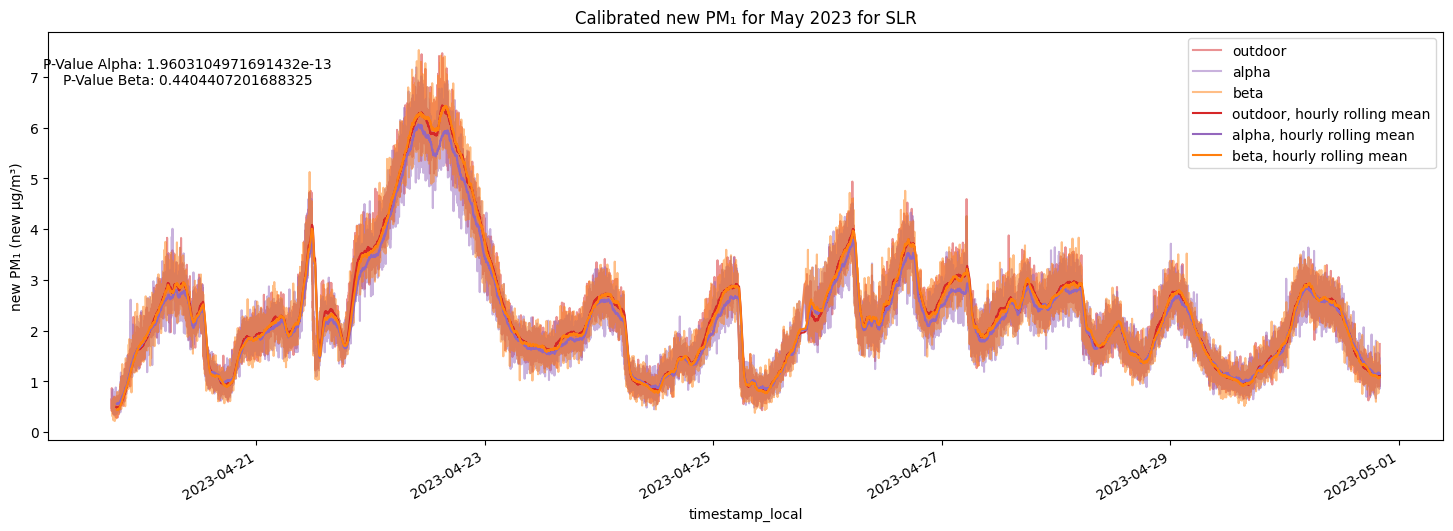

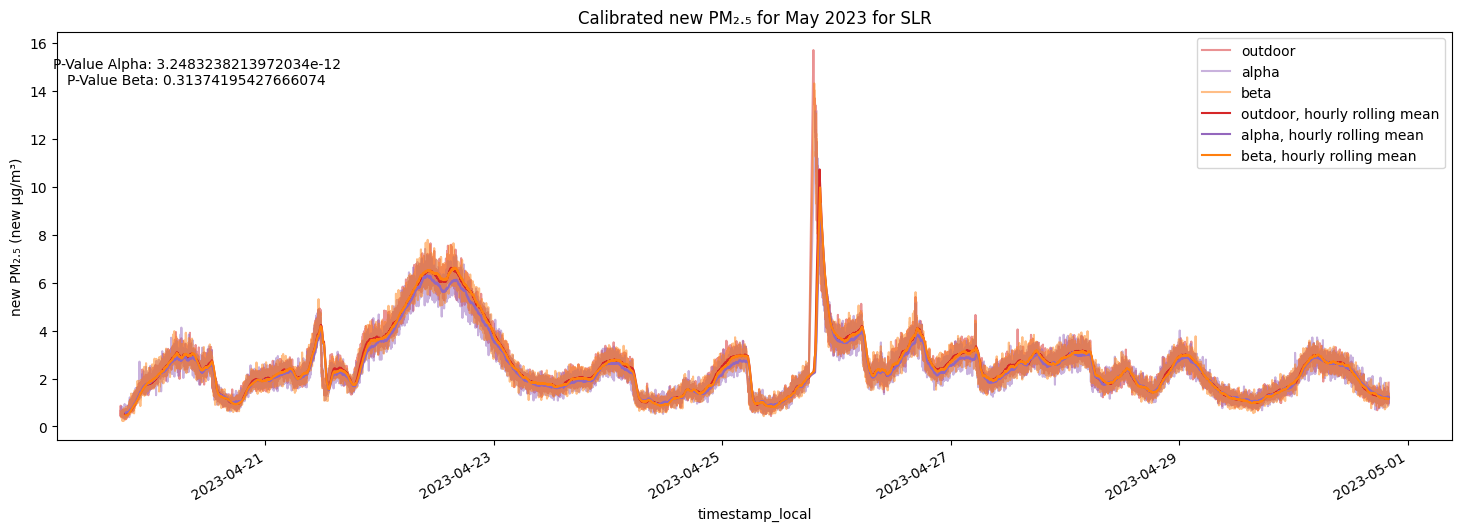

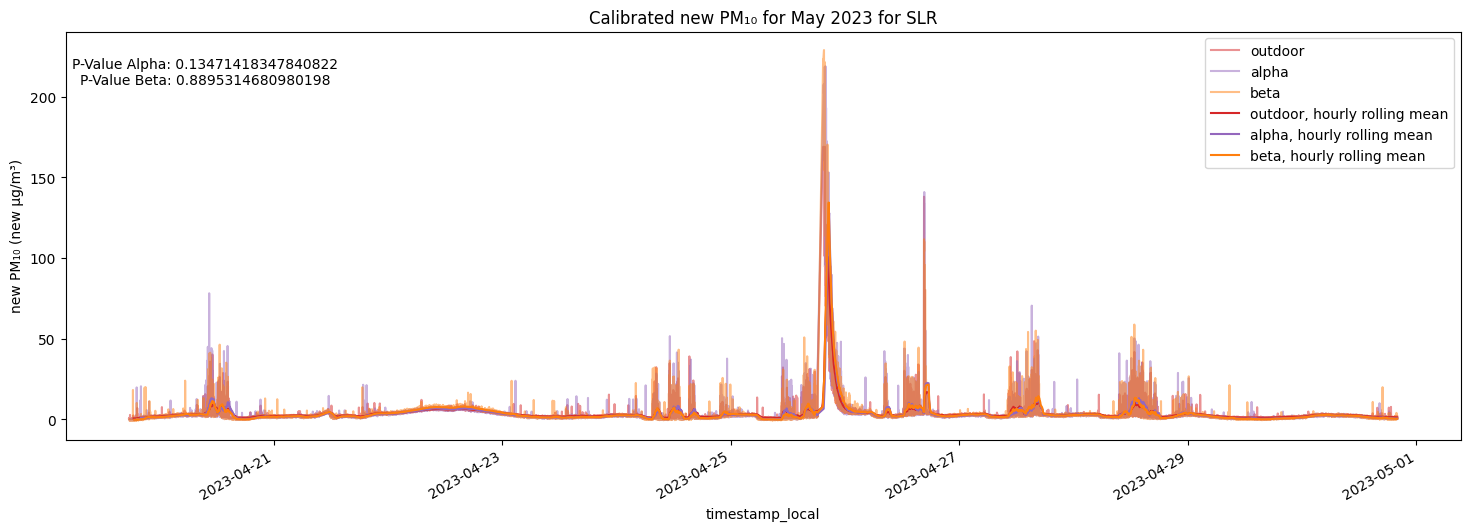

In [35]:

for  parameter in parameters[1:4]:
    test_dfMod[f'60 mean { parameter["name"]}']=test_dfMod[ parameter['name']].rolling(60).mean()
    test_dfAlp[f'60 mean {"new " + parameter["name"]}']=test_dfAlp["new " + parameter['name']].rolling(60).mean()
    test_dfBet[f'60 mean {"new " + parameter["name"]}']=test_dfBet["new " + parameter['name']].rolling(60).mean()
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.gcf().set_size_inches(18, 6)
    plt.title(f'Calibrated {"new " + parameter["label"]} for May 2023 for SLR')
    plt.ylabel(f'{"new " + parameter["label"]} ({"new " + parameter["unit"]})')
    plt.xlabel('Time (days)')
    plt.grid(True)
    
    _, p_value_alpha = stats.ttest_ind(test_dfMod[ parameter["name"]], test_dfAlp["new " + parameter["name"]], equal_var=False)
    _, p_value_beta = stats.ttest_ind(test_dfMod[ parameter["name"]], test_dfBet["new " + parameter["name"]], equal_var=False)
    plt.text(0.1, 0.9, f'P-Value Alpha: {p_value_alpha}\nP-Value Beta: {p_value_beta}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10)

   

    test_dfMod[parameter["name"]].plot(color='tab:red', label='outdoor', alpha=0.5)
    test_dfAlp["new " + parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.5)
    test_dfBet["new " + parameter["name"]].plot(color='tab:orange', label='beta', alpha=0.5)
    test_dfMod[f'60 mean { parameter["name"]}'].plot(color='tab:red', label='outdoor, hourly rolling mean')
    test_dfAlp[f'60 mean {"new " + parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
    test_dfBet[f'60 mean {"new " + parameter["name"]}'].plot(color='tab:orange', label='beta, hourly rolling mean')
    plt.legend()

    print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
    print(f"{parameter['label']} P-Value Beta:", p_value_beta)


0.9089781793267846
0.9724314107727929
0.9162529855689742
0.9743307646081539
1.0244367276021817
1.0479822024003949


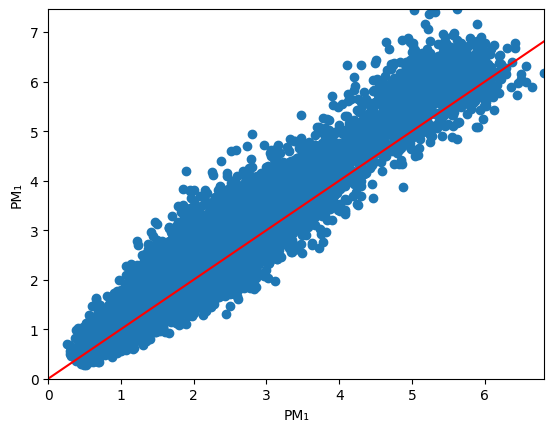

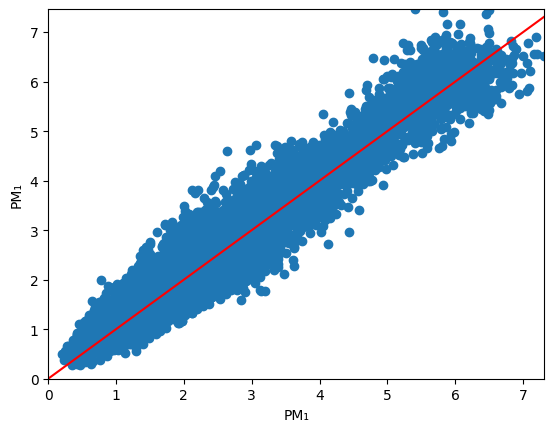

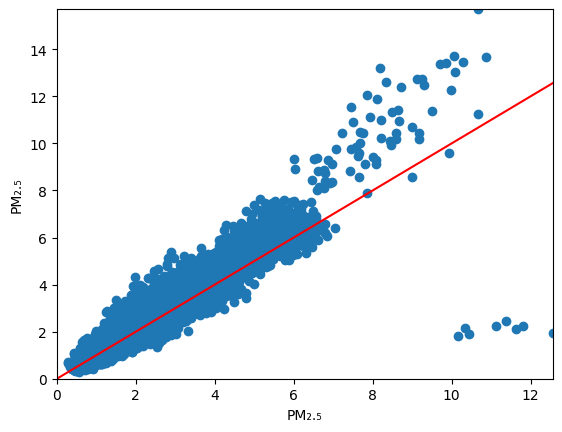

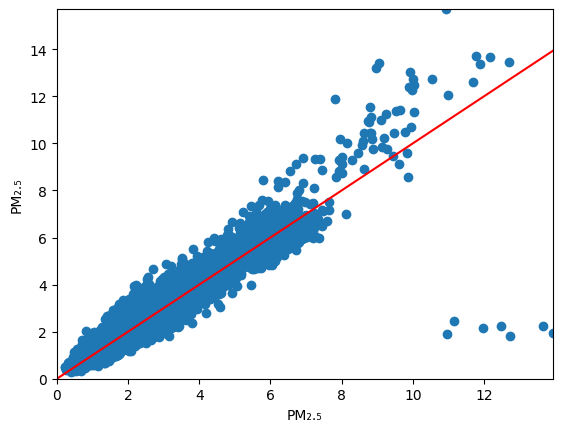

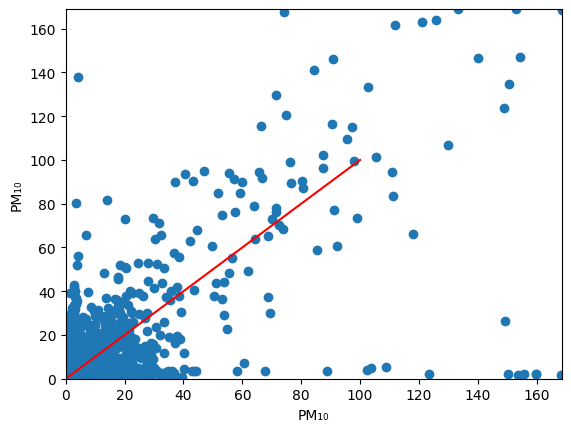

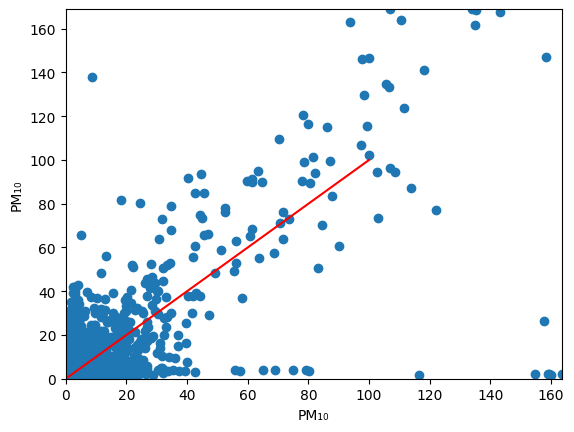

In [36]:

x = np.linspace(0, 100, 1000)
y = np.linspace(0, 100, 1000)

for parameter in parameters[1:4]:
    fig = plt.figure()
    ax = plt.subplot(111)
    
    plt.plot(test_dfAlp[parameter["name"]],test_dfMod[parameter["name"]][:len(test_dfAlp)], 'o', label='Original data')
    plt.plot(x, y, 'r', label='Fitted line')
    
    plt.ylim(0, max(test_dfMod[parameter["name"]][:len(test_dfAlp)]))
    plt.xlim(0, max(test_dfAlp[parameter["name"]]))
    plt.xlabel(parameter["label"])
    plt.ylabel(parameter["label"])

    fig = plt.figure()
    ax = plt.subplot(111)
    
    plt.plot(test_dfBet[parameter["name"]],test_dfMod[parameter["name"]][:len(test_dfBet)], 'o', label='Original data')
    plt.plot(x, y, 'r', label='Fitted line')

    plt.ylim(0, max(test_dfMod[parameter["name"]][:len(test_dfBet)]))
    plt.xlim(0, max(test_dfBet[parameter["name"]]))
    
    
    plt.xlabel(parameter["label"])
    plt.ylabel(parameter["label"])


    
    print(np.mean(test_dfAlp[parameter["name"]][:len(dfAlp)]/dfMod[parameter["name"]][:len(dfAlp)]))
    print(np.mean(test_dfBet[parameter["name"]][:len(dfBet)]/dfMod[parameter["name"]][:len(dfBet)]))
    

0.9814806745231787
1.0048368750551886
0.9819755318103994
1.004051541817503
0.9090159847241641
0.9076964641719787


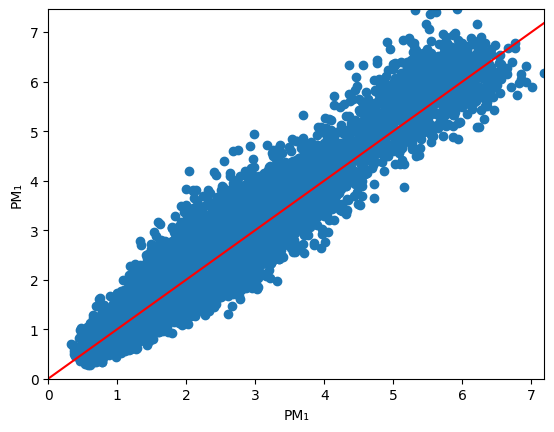

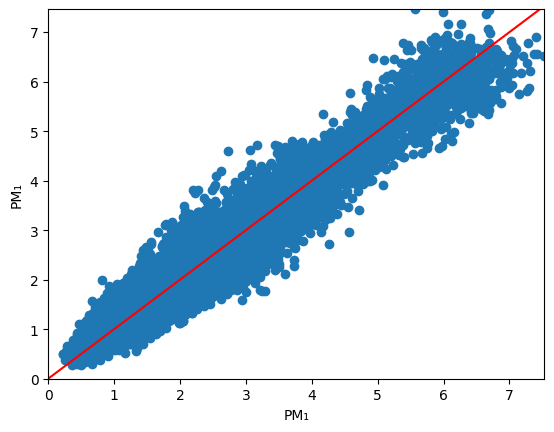

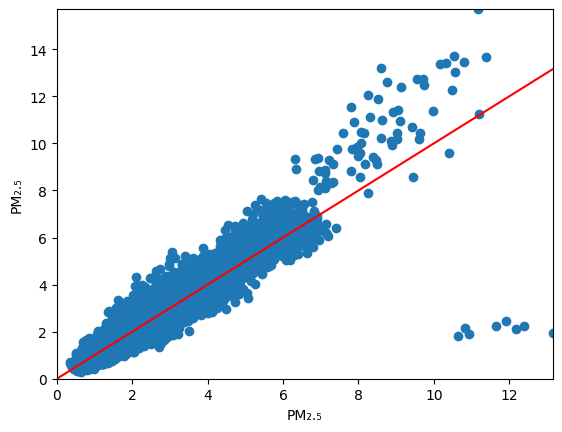

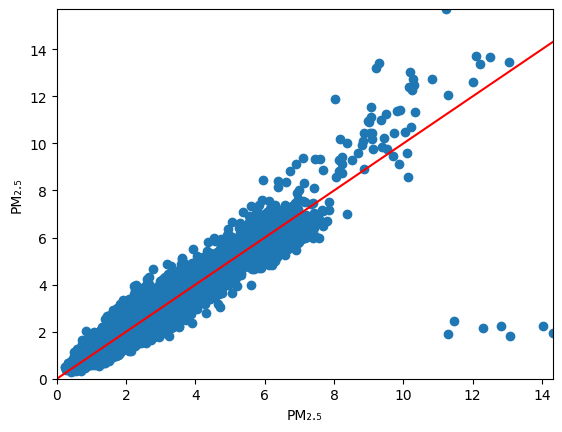

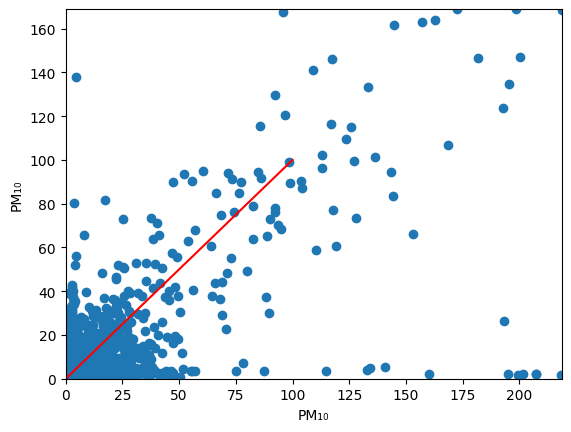

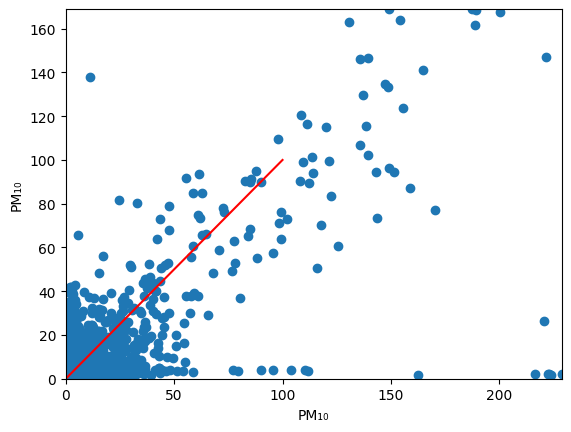

In [37]:


x = np.linspace(0, 100, 1000)
y = np.linspace(0, 100, 1000)

for parameter in parameters[1:4]:
    fig = plt.figure()
    ax = plt.subplot(111)
    
    plt.plot(test_dfAlp["new " + parameter["name"]],test_dfMod[parameter["name"]][:len(test_dfAlp)], 'o', label='Original data')
    plt.plot(x, y, 'r', label='Fitted line')
    
    plt.ylim(0, max(test_dfMod[parameter["name"]][:len(test_dfAlp)]))
    plt.xlim(0, max(test_dfAlp["new " + parameter["name"]]))
    plt.xlabel(parameter["label"])
    plt.ylabel(parameter["label"])

    fig = plt.figure()
    ax = plt.subplot(111)
    
    plt.plot(test_dfBet["new " + parameter["name"]],test_dfMod[parameter["name"]][:len(test_dfBet)], 'o', label='Original data')
    plt.plot(x, y, 'r', label='Fitted line')

    plt.ylim(0, max(test_dfMod[parameter["name"]][:len(test_dfBet)]))
    plt.xlim(0, max(test_dfBet["new " + parameter["name"]]))
    
    
    plt.xlabel(parameter["label"])
    plt.ylabel(parameter["label"])


    
    
    print(np.mean(test_dfAlp["new " +parameter["name"]][:len(dfAlp)]/dfMod[parameter["name"]][:len(dfAlp)]))
    print(np.mean(test_dfBet["new " +parameter["name"]][:len(dfBet)]/dfMod[parameter["name"]][:len(dfBet)]))